# Problem 2: Linear Discriminative Analysis

## 2.2 implement GaussianDiscAnalysis class, fit the model with breast cancer data (using the first two features), plot the testing data and the decision boundary

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


class GaussianDiscAnalysis:
    """
    Fits a Linear Discriminant Analysis Model for binary class

    """

    def compute_phi(self, y):
        """prior probability of positive class: P(Y=1)"""
        return (1 / len(y)) * len(y[y == 1])

    def compute_mu(self, X, y):
        """
        compute Mu for the positive class and negative class
        :param X: matrix of nxd  (n is sample size and d is number of features)
        :param y: matrix of nx1
        :param cls: integer 0/1
        :return: matrix of 2xd with the first row being the mean of 0 class and the second row being the mean of class 1
        """
        # TODO
        mu = np.zeros((2, X.shape[-1]), dtype=np.float32)
        
        # y == 0 returns the index such that y[index] = 0. This can be used to select the rows we want
        mu[0] = X[y==0].mean(axis=0)
        mu[1] = X[y==1].mean(axis=0)

        return mu

    def compute_sigma(self, X, y):
        """
        compute the common covariance matrix which is shared by the two classes
        :param X: matrix of nxd  (n is sample size and d is number of features)
        :param y: matrix of nx1
        :return:  dxd covariance matrix
        """
        # TODO
        
        # shape: n x d. Select the rows that belong to class 0 and 1 respectively
        X_minus_mu0 = (X[y==0] - self.mu[0])
        X_minus_mu1 = (X[y==1] - self.mu[1])
        
        # check: d x d
        scatter = X_minus_mu0.T.dot(X_minus_mu0) + X_minus_mu1.T.dot(X_minus_mu1)
        
        return scatter / X.shape[0]

    def gaussian_p(self, x, cls):
        """
        Probability of X=x given y (Assume the conditional distribution is gaussian distribution)
        To get the inverse and determinant of an matrix you can use the module np.linalg
        :param x: 1D vector which is the feature vector for one observation
        :param cls: interger 0/1
        :return: probability density value of X=x|Y=cls
        """
        d = len(x)
        sigma_inv = np.linalg.inv(self.sigma)
        det_sigma = np.linalg.det(self.sigma)
        Pxi = (1 / ((2 * np.pi) ** (d / 2))) * (1 / (det_sigma ** 0.5)) \
              * np.exp(- 0.5 * (x - self.mu[cls]).dot(sigma_inv).dot(x - self.mu[cls]))
        return Pxi

    def fit(self, X, y):
        """Computes mean, covariance and proabilities of y (phi)"""
        self.d = X.shape[1]
        # the prior probability of Y=1
        self.phi = self.compute_phi(y)
        # mean of X for each class
        self.mu = self.compute_mu(X, y)
        # the common covariance matrix
        self.sigma = self.compute_sigma(X, y)

    def predict(self, X):
        """
        make prediction based on P(Y|X).
        You can effectively compare P(Y=1)*P(X|Y=1) v.s. P(Y=0)*P(X|Y=0)
        :param X: 2D vector which each row representing a data point
        :return: 1D vector which each element being 0/1
        """        
        # TODO
        y = np.zeros(np.size(X, 0))
        for i in range(len(X)):
            pred1 = self.gaussian_p(X[i, :], 1) * self.phi
            pred0 = self.gaussian_p(X[i, :], 0) * (1 - self.phi)
            y[i] = 1 if pred1 > pred0 else 0
        return y

In [2]:
breast_cancer = load_breast_cancer()
data = np.array(breast_cancer.data)
label = np.array(breast_cancer.target)
data = MinMaxScaler().fit_transform(data)

In [3]:
# Split the training set and test set (only keep the first two features )
train_data, test_data, train_label, test_label = train_test_split(data[:, :2], label, test_size=1 / 4, random_state=0)

In [4]:
# fit the model using the data
gda = GaussianDiscAnalysis()
gda.fit(train_data, train_label)
test_pred = gda.predict(test_data)
print('the accuracy score is {}'.format(accuracy_score(test_label, test_pred)))

the accuracy score is 0.8951048951048951


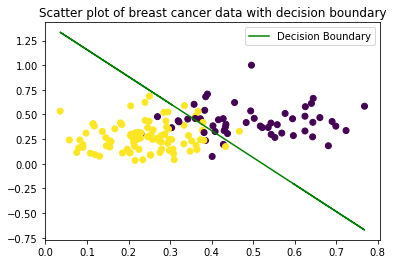

[1.43116203] [-2.73736904]


In [6]:
""""P2.2 plot the data and the decision boundary"""
# data visualization
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label)
plt.title("Scatter plot of breast cancer data with decision boundary")

# TODO
# Plotting the decision boundary
sigma_inv = np.linalg.pinv(gda.sigma)
phi, mu_0, mu_1 = gda.phi, gda.mu[0, :], gda.mu[1, :]
theta_0 = 0.5 * (mu_0.T.dot(sigma_inv).dot(mu_0) - mu_1.T.dot(sigma_inv).dot(mu_1)) - np.log((1 - phi) / phi)
theta = sigma_inv.dot(mu_0 - mu_1).reshape((2, 1))
w1, w2 = theta[0], theta[1]

# calculate x2 given x1 from the test data similar to problem 1
test_x2 = theta_0 / w2 - w1 * test_data[:, 0] / w2


# plot decision boundary
plt.plot(test_data[:, 0], test_x2, color='green', label='Decision Boundary')
plt.legend()
plt.show()

# print out the intercept and the slope of the linear decision boundary
print (theta_0 / w2, -w1/w2)